<a href="https://colab.research.google.com/github/Monika0818-senthil/SCT_DS_3/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Sample Data:
   age         job   marital  education  balance housing loan    contact  \
0   62     student    single   tertiary      302     yes   no  telephone   
1   18     student    single   tertiary     1072      no  yes  telephone   
2   21  technician   married   tertiary      461     yes   no  telephone   
3   21     student    single  secondary     -373      no  yes   cellular   
4   57     retired  divorced    primary     -990      no  yes  telephone   

   duration  campaign  pdays  previous    y  
0       912         3     -1         1  yes  
1       832         3      5         1   no  
2       323         1     20         3   no  
3       123         4      5         4   no  
4        69         2     10         1   no  

✅ Training Set Size: (350, 17)
✅ Test Set Size: (150, 17)

✅ Sample Predictions:
Predicted: [0 0 1 1 0 0 0 1 0 0]
Actual:    [1 0 0 0 0 0 0 0 0 0]

✅ Accuracy: 0.6

✅ Classification Report:
              precision    recall  f1-score   support

      

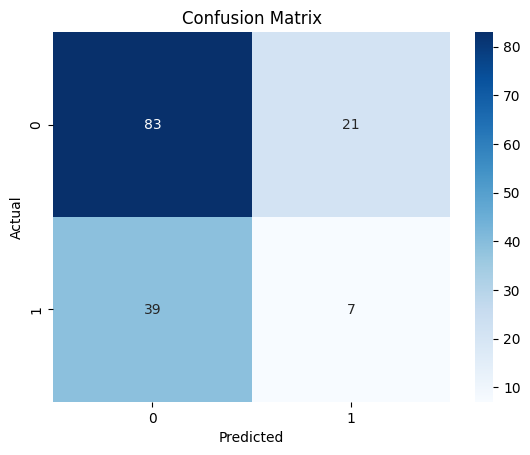

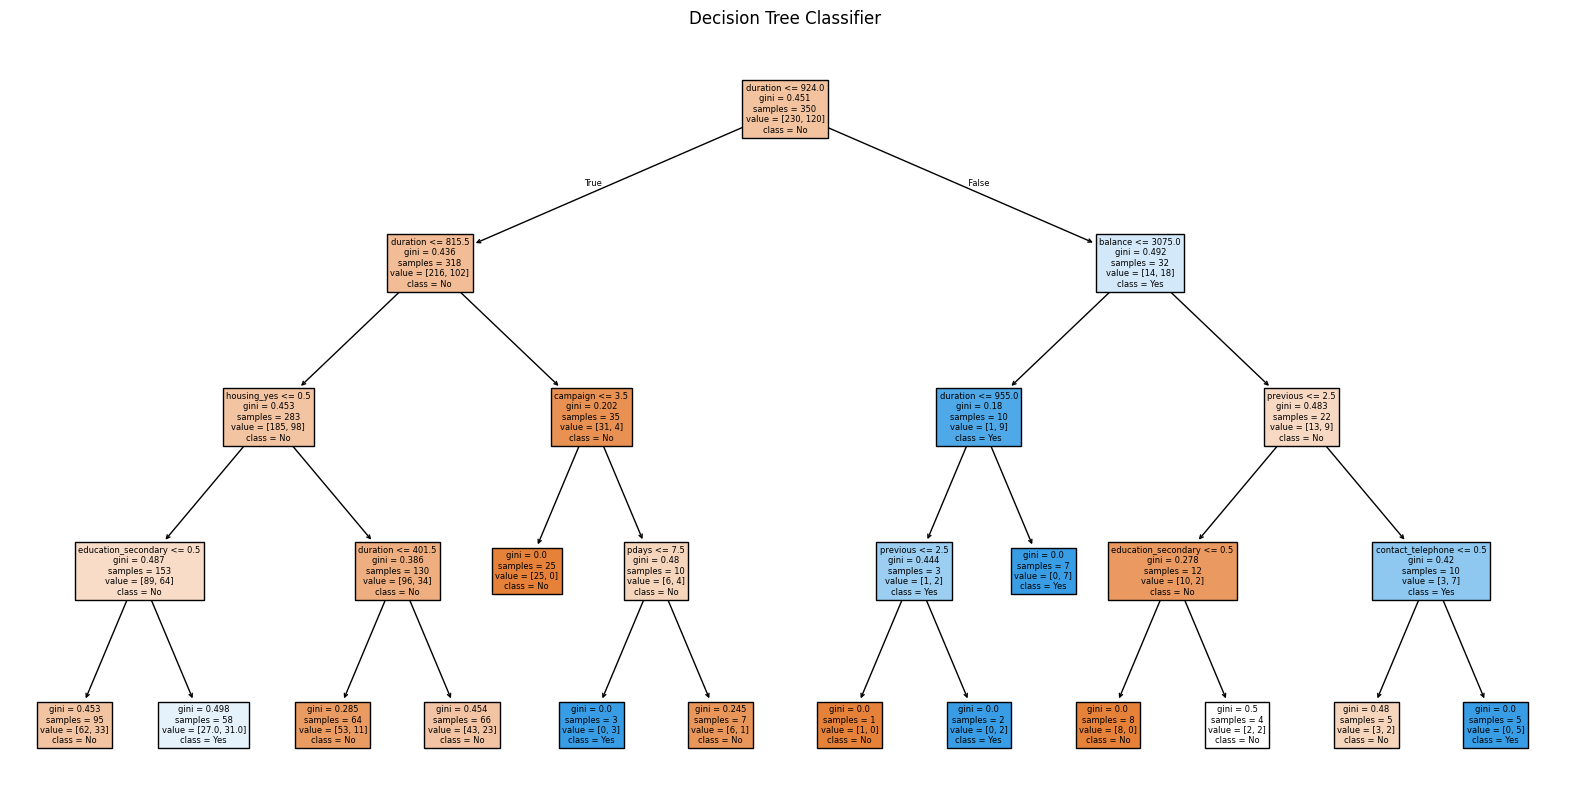

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Step 1: Generate Fake Bank Marketing Data
# ---------------------------
np.random.seed(0)
n = 500

df = pd.DataFrame({
    'age': np.random.randint(18, 65, size=n),
    'job': np.random.choice(['admin', 'technician', 'blue-collar', 'student', 'retired'], size=n),
    'marital': np.random.choice(['married', 'single', 'divorced'], size=n),
    'education': np.random.choice(['primary', 'secondary', 'tertiary'], size=n),
    'balance': np.random.randint(-2000, 10000, size=n),
    'housing': np.random.choice(['yes', 'no'], size=n),
    'loan': np.random.choice(['yes', 'no'], size=n),
    'contact': np.random.choice(['cellular', 'telephone'], size=n),
    'duration': np.random.randint(0, 1000, size=n),
    'campaign': np.random.randint(1, 5, size=n),
    'pdays': np.random.choice([-1, 5, 10, 20], size=n),
    'previous': np.random.randint(0, 5, size=n),
    'y': np.random.choice(['yes', 'no'], size=n, p=[0.3, 0.7])
})

print("✅ Sample Data:")
print(df.head())

# ---------------------------
# Step 2: Preprocessing
# ---------------------------
df_encoded = pd.get_dummies(df.drop('y', axis=1), drop_first=True)
target = df['y'].map({'no': 0, 'yes': 1})

X_train, X_test, y_train, y_test = train_test_split(df_encoded, target, test_size=0.3, random_state=42)

print("\n✅ Training Set Size:", X_train.shape)
print("✅ Test Set Size:", X_test.shape)

# ---------------------------
# Step 3: Train the Decision Tree Classifier
# ---------------------------
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# ---------------------------
# Step 4: Print Results
# ---------------------------
print("\n✅ Sample Predictions:")
print("Predicted:", y_pred[:10])
print("Actual:   ", y_test.values[:10])

# Accuracy & Classification
acc = accuracy_score(y_test, y_pred)
print("\n✅ Accuracy:", round(acc, 3))

print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n✅ Confusion Matrix:\n", cm)

# ---------------------------
# Step 5: Plot Confusion Matrix & Decision Tree
# ---------------------------
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=df_encoded.columns, class_names=['No', 'Yes'])
plt.title("Decision Tree Classifier")
plt.show()
